### Summary

JupyterLab and Jupyter Notebook can display HTML-embedded images in notebook documents. You can use
the `IPython.display.HTML` class to structure these images into a basic image gallery.

### Example

[![Binder](https://mybinder.org/badge_logo.svg)](https://mybinder.org/v2/gist/parente/691d150c934b89ce744b5d54103d7f1e/master?filepath=gallery.ipynb)

The notebook below defines a `gallery()` function that accepts a list of image URLs, local image
file paths, or bytes in memory. The function displays the images from left-to-right, top-to-bottom
in the notebook. An optional `max_height` parameter scales all images to the same height to create
more regular looking rows.

The notebook includes two demos of the function output.

### Why is this useful?

You may find a gallery view useful when you need to visually scan a large set of images. The
horizontal layout helps reduce notebook scrolling. The fixed height option lets you pack more images
on the screen at once and spot coarse differences.


<h4 class="embedFilename"><i class="fa fa-file" aria-hidden="true"></i> gallery.ipynb</h4>

## Gallery

In [56]:
from IPython.display import HTML, Image

def _src_from_data(data):
    """Base64 encodes image bytes for inclusion in an HTML img element"""
    img_obj = Image(data=data)
    for bundle in img_obj._repr_mimebundle_():
        for mimetype, b64value in bundle.items():
            if mimetype.startswith('image/'):
                return f'data:{mimetype};base64,{b64value}'

def gallery(images, row_height='auto'):
    """Shows a set of images in a gallery that flexes with the width of the notebook.
    
    Parameters
    ----------
    images: list of str or bytes
        URLs or bytes of images to display

    row_height: str
        CSS height value to assign to all images. Set to 'auto' by default to show images
        with their native dimensions. Set to a value like '250px' to make all rows
        in the gallery equal height.
    """
    figures = []
    for image in images:
        if isinstance(image, bytes):
            src = _src_from_data(image)
            caption = ''
        else:
            src = image
            caption = f'<figcaption style="font-size: 0.6em">{image}</figcaption>'
        figures.append(f'''
            <figure style="margin: 5px !important;">
              <img src="{src}" style="height: {row_height}">
              {caption}
            </figure>
        ''')
    return HTML(data=f'''
        <div style="display: flex; flex-flow: row wrap; text-align: center;">
        {''.join(figures)}
        </div>
    ''')

## Demos

Generate URLs for images of varying sizes using [Lorem Picsum](https://picsum.photos/).

In [8]:
import random

urls = []
for i in range(25):
    width = random.randrange(400, 800)
    height = random.randrange(400, 800)
    urls.append(f'https://picsum.photos/{width}/{height}?random={i}')

Render a gallery of the images with a row height.

In [9]:
gallery(urls, max_height='150px')

Generate in-memory PNGs for avatar characters using the [pagan](https://github.com/daboth/pagan) library.

In [57]:
import io
import pagan

pngs = []
for i in range(50):
    buffer = io.BytesIO()
    pagan.Avatar(f'{i}').img.save(buffer, 'png')
    pngs.append(buffer.getvalue())

Render a gallery of the avatars with their natural dimensions.


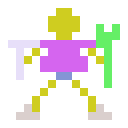
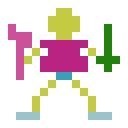
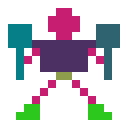
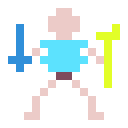
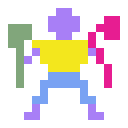
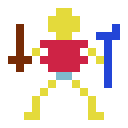
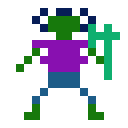
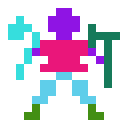
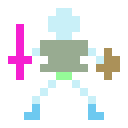
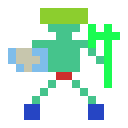
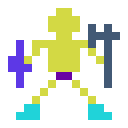
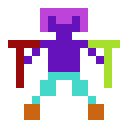
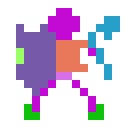
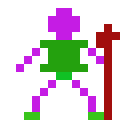
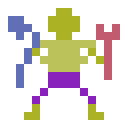
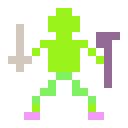
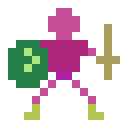
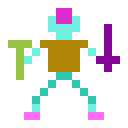
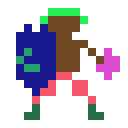
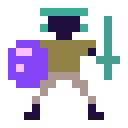
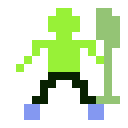
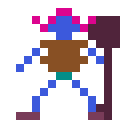
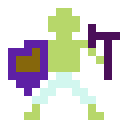
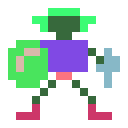
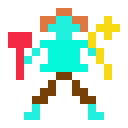
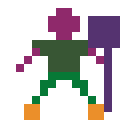
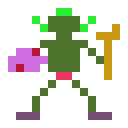
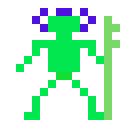
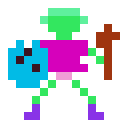
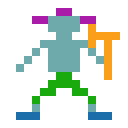
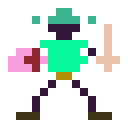
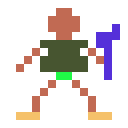
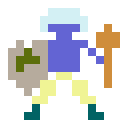
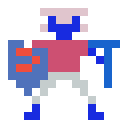
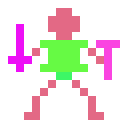
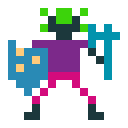
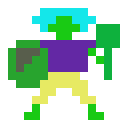
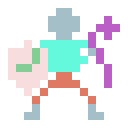
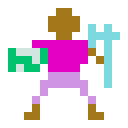
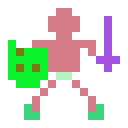
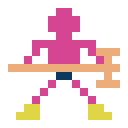
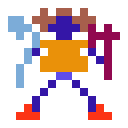
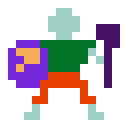
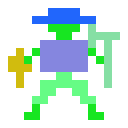
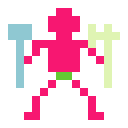
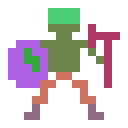
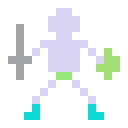
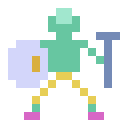
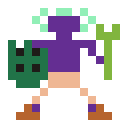
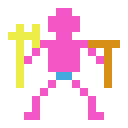

In [55]:
gallery(pngs)